# Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
from statsFuncs import mean_confidence_interval
import scipy
from sklearn.linear_model import LinearRegression
from statsFuncs import compDistributions


mpl.rcParams['axes.linewidth'] = 2

# Paths 

In [2]:
fig4_path = os.getcwd()
figures_path = str(Path(fig4_path).parent)
datapath = figures_path + '/data/naive_subjects/Analysis9_29_2020/naive_back_rbf/'
regression_figures_path = fig4_path + '/regression_figures/'

# Plot params 

In [3]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Get folder and subject info 

Get number of subjects, which is number of folders in datapath -1 (the super subject)

In [4]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects = folders-1

78 files, 12 folders
11 subjects


# Subject loop 

## +=19

In [7]:
nTypes = ['1', '2', '3']
# subject_names = ['AR', 'AS', 'CAN', 'CG', 'CK', 'CT', 'EK', 'ES', 'EW', 'HE', 'HL', 'HOL', 'HY', 'IS', 'JP', 'MF', 'NC','SA', 'SK', 'SS']
subject_names = ['AR', 'CK', 'CT', 'EW', 'HL', 'IS', 'JP', 'MF', 'NC', 'SK', 'SS']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

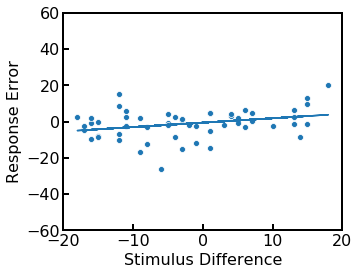

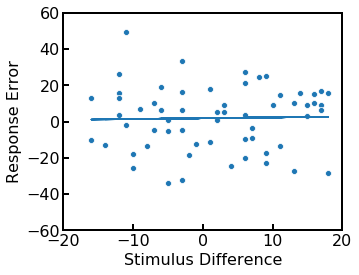

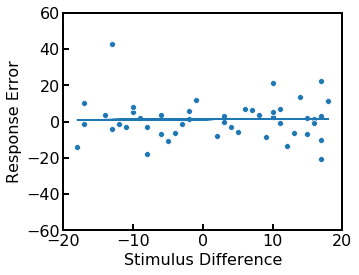

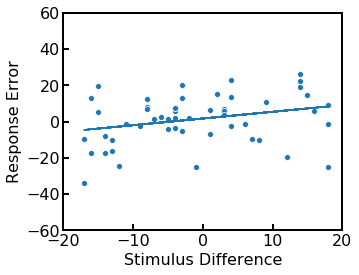

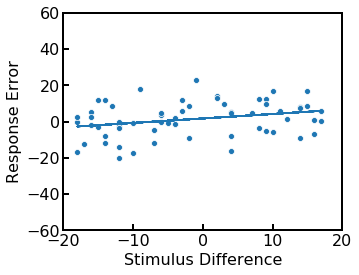

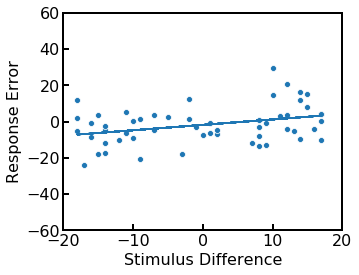

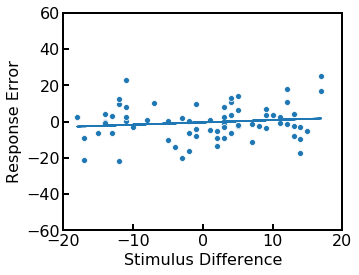

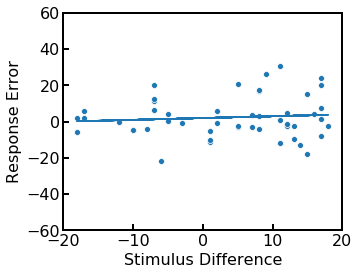

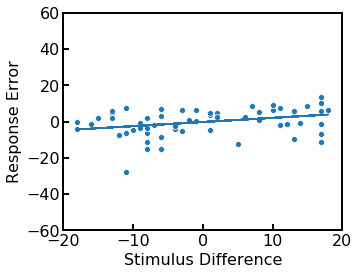

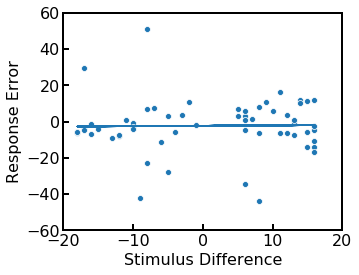

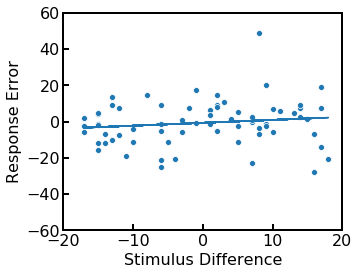

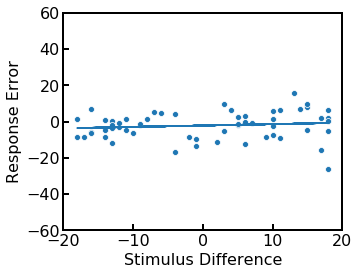

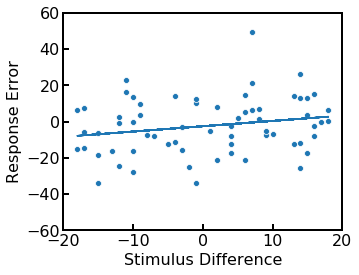

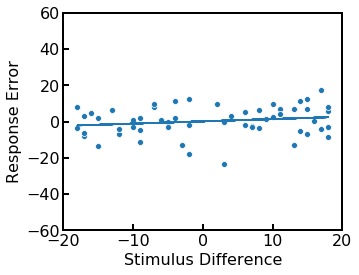

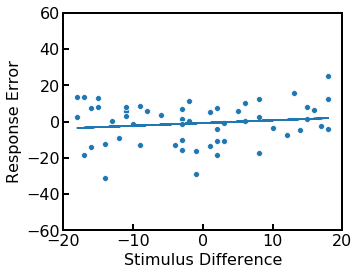

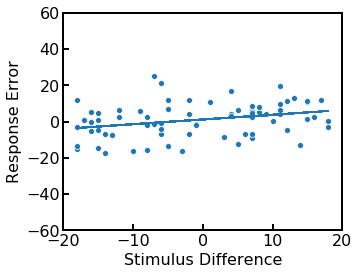

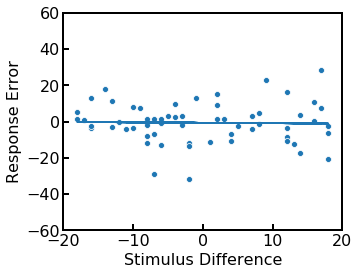

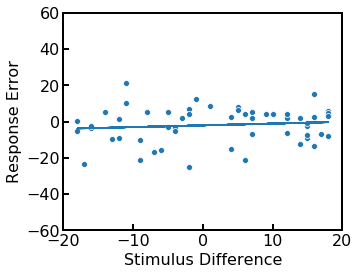

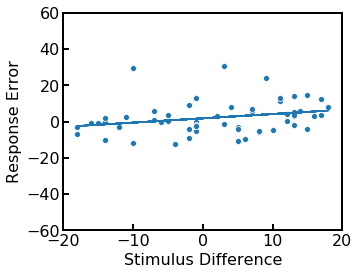

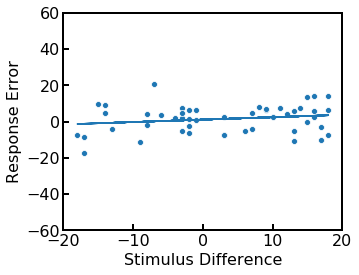

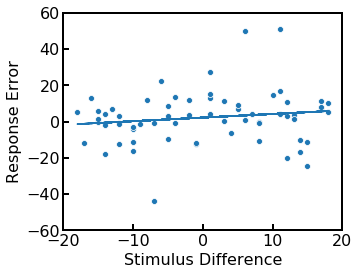

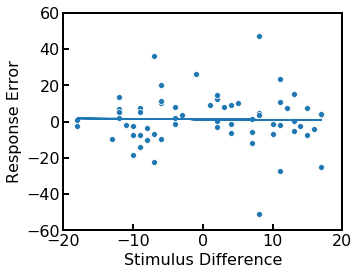

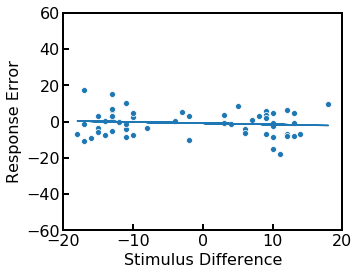

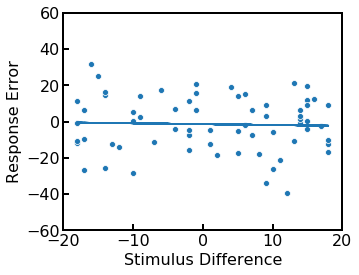

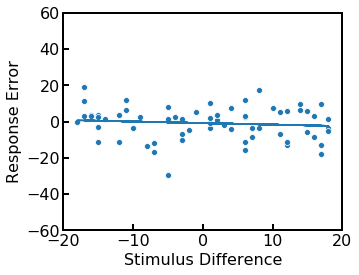

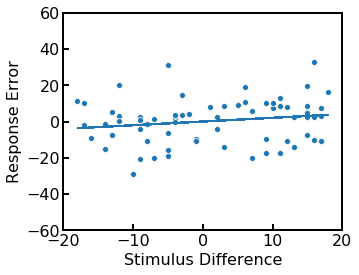

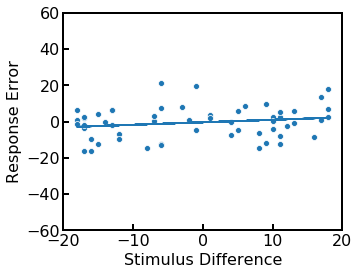

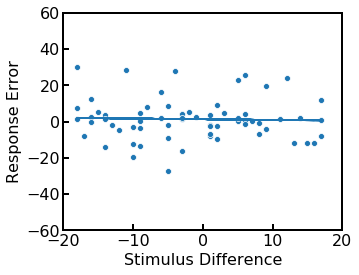

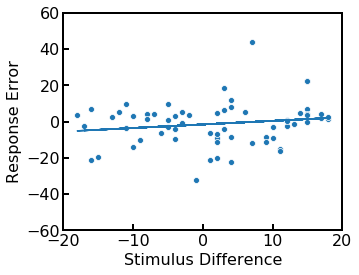

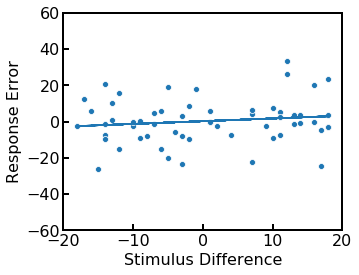

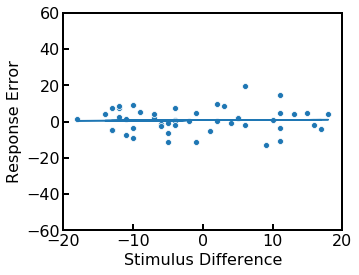

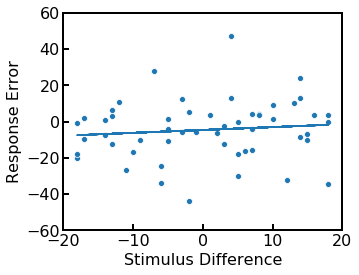

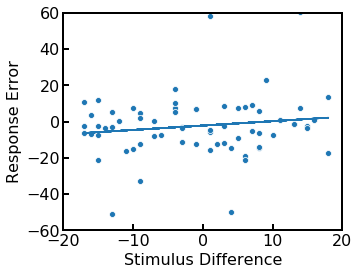

In [21]:
filter_plusminus = 19
fitting_all_data_19 = pd.DataFrame()
fitting_ntype_data_19 = pd.DataFrame()
row_subject = 0
row_all = 0
for ntype in nTypes: 
    row_type = 0
    fitting_tmp = pd.DataFrame()
    for subject in subject_names:

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
        subjectdata = pd.read_csv(filename)
        

        # select the columns we care about
        subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
        # drop the NaNs, see above the explanation why
        subjectdata_nonan = subjectdata_selcols.dropna()
        
        # restrict to +- 19
        subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
        # fit regression line
        slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
        plt.figure(figsize=(5, 4))
        ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
        plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
        plt.xlabel('Stimulus Difference')
        plt.ylabel('Response Error')
        plt.xlim(-20, 20)
        plt.ylim(-60, 60)
        plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.eps', bbox_inches='tight', dpi=1200)
        plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.jpg', bbox_inches='tight', dpi=1200)
        
        fitting_all_data_19.loc[row_subject, 'SUBJECT'] = subject
        fitting_all_data_19.loc[row_subject, 'TYPE'] = ntype        
        fitting_all_data_19.loc[row_subject, 'SLOPE'] = slope
        fitting_all_data_19.loc[row_subject, 'INTERCEPT'] =intercept
        
        fitting_tmp.loc[row_type, 'SUBJECT'] = subject
        fitting_tmp.loc[row_type, 'TYPE'] = ntype        
        fitting_tmp.loc[row_type, 'SLOPE'] = slope
        fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
        row_type += 1
        row_subject += 1
        
    mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_sem(fitting_tmp['SLOPE'])

    fitting_ntype_data_19.loc[row_all, 'TYPE'] = ntype
    fitting_ntype_data_19.loc[row_all, 'SLOPE_MEAN'] = mean_slope
    fitting_ntype_data_19.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
    fitting_ntype_data_19.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
    row_all += 1
        

In [22]:
fitting_ci_19 = pd.DataFrame(columns= nTypes)
for i in range(len(fitting_ntype_data_19)):
    
    print(i)
    ntype = fitting_ntype_data_19.loc[i, 'TYPE']
    low = fitting_ntype_data_19.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data_19.loc[i, 'SLOPE_CI_LOW']
    up = fitting_ntype_data_19.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data_19.loc[i, 'SLOPE_MEAN'] 
    
    fitting_ci_19.loc[0, ntype] = low
    fitting_ci_19.loc[1, ntype] = up

0
1
2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

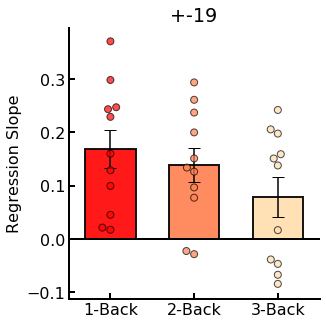

In [23]:
filter_plusminus = 19
plt.figure(figsize=(4.5, 5))

plt.bar(fitting_ntype_data_19['TYPE'], fitting_ntype_data_19['SLOPE_MEAN'], yerr=fitting_ci_19.to_numpy(), ecolor='black',
       capsize=6, color = ['red', 'coral', 'navajowhite'], edgecolor='k', alpha=0.9, width=0.6, linewidth=2)
ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data_19, dodge=True, size=7, alpha=0.7, edgecolor='k', linewidth=1, palette=['red', 'coral', 'navajowhite'])
plt.title('+-' +  str(filter_plusminus))
plt.ylabel('Regression Slope')
plt.xlabel('')
ax.set_xticklabels(['1-Back', '2-Back', '3-Back'])
plt.axhline(0, linestyle='-', linewidth=2, c='k')
sns.despine()
plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.eps', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)

## +- 23 

In [24]:
# filter_plusminus = 23
# nTypes = ['1', '2', '3']
# subject_names = ['AR', 'CK', 'CT', 'EW', 'HL', 'IS', 'JP', 'MF', 'NC', 'SK', 'SS']
# fitting_all_data = pd.DataFrame()
# fitting_ntype_data = pd.DataFrame()
# row_subject = 0
# row_all = 0
# for ntype in nTypes: 
#     row_type = 0
#     fitting_tmp = pd.DataFrame()
#     for subject in subject_names:

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
#         subjectdata = pd.read_csv(filename)
        

#         # select the columns we care about
#         subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
#         # drop the NaNs, see above the explanation why
#         subjectdata_nonan = subjectdata_selcols.dropna()
        
#         # restrict to +- 19
#         subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
#         # fit regression line
#         slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
#         plt.figure(figsize=(5, 4))
#         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
#         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
#         plt.xlabel('Stimulus Difference')
#         plt.ylabel('Response Error')
#         plt.xlim(-20, 20)
#         plt.ylim(-60, 60)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.eps', bbox_inches='tight', dpi=1200)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.jpg', bbox_inches='tight', dpi=1200)
        
#         fitting_all_data.loc[row_subject, 'SUBJECT'] = subject
#         fitting_all_data.loc[row_subject, 'TYPE'] = ntype        
#         fitting_all_data.loc[row_subject, 'SLOPE'] = slope
#         fitting_all_data.loc[row_subject, 'INTERCEPT'] =intercept
        
#         fitting_tmp.loc[row_type, 'SUBJECT'] = subject
#         fitting_tmp.loc[row_type, 'TYPE'] = ntype        
#         fitting_tmp.loc[row_type, 'SLOPE'] = slope
#         fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
#         row_type += 1
#         row_subject += 1
        
#     mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_sem(fitting_tmp['SLOPE'])

#     fitting_ntype_data.loc[row_all, 'TYPE'] = ntype
#     fitting_ntype_data.loc[row_all, 'SLOPE_MEAN'] = mean_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
#     row_all += 1
        

# fitting_ci = pd.DataFrame(columns= nTypes)
# for i in range(len(fitting_ntype_data)):
    
#     print(i)
#     ntype = fitting_ntype_data.loc[i, 'TYPE']
#     low = fitting_ntype_data.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data.loc[i, 'SLOPE_CI_LOW']
#     up = fitting_ntype_data.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data.loc[i, 'SLOPE_MEAN'] 
    
#     fitting_ci.loc[0, ntype] = low
#     fitting_ci.loc[1, ntype] = up



In [25]:
# plt.figure(figsize=(10, 6))

# plt.bar(fitting_ntype_data['TYPE'], fitting_ntype_data['SLOPE_MEAN'], yerr=fitting_ci.to_numpy(), ecolor='black',
#        capsize=6, color = 'darkgray')
# ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data, dodge=True, size=10, alpha=0.7)
# plt.title('+-' +  str(filter_plusminus))
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.eps', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)

## +- 25 

In [26]:
# filter_plusminus = 25
# nTypes = ['1', '2', '3']
# subject_names = ['AR', 'AS', 'CAN', 'CG', 'CK', 'CT', 'EK', 'ES', 'EW', 'HE', 'HL', 'HOL', 'HY', 'IS', 'JP', 'MF', 'NC','SA', 'SK', 'SS']

# fitting_all_data = pd.DataFrame()
# fitting_ntype_data = pd.DataFrame()
# row_subject = 0
# row_all = 0
# for ntype in nTypes: 
#     row_type = 0
#     fitting_tmp = pd.DataFrame()
#     for subject in subject_names:

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
#         subjectdata = pd.read_csv(filename)
        

#         # select the columns we care about
#         subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
#         # drop the NaNs, see above the explanation why
#         subjectdata_nonan = subjectdata_selcols.dropna()
        
#         # restrict to +- 19
#         subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
#         # fit regression line
#         slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
#         plt.figure(figsize=(5, 4))
#         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
#         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
#         plt.xlabel('Stimulus Difference')
#         plt.ylabel('Response Error')
#         plt.xlim(-20, 20)
#         plt.ylim(-60, 60)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.eps', bbox_inches='tight', dpi=1200)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.jpg', bbox_inches='tight', dpi=1200)
        
#         fitting_all_data.loc[row_subject, 'SUBJECT'] = subject
#         fitting_all_data.loc[row_subject, 'TYPE'] = ntype        
#         fitting_all_data.loc[row_subject, 'SLOPE'] = slope
#         fitting_all_data.loc[row_subject, 'INTERCEPT'] =intercept
        
#         fitting_tmp.loc[row_type, 'SUBJECT'] = subject
#         fitting_tmp.loc[row_type, 'TYPE'] = ntype        
#         fitting_tmp.loc[row_type, 'SLOPE'] = slope
#         fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
#         row_type += 1
#         row_subject += 1
        
#     mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_sem(fitting_tmp['SLOPE'])

#     fitting_ntype_data.loc[row_all, 'TYPE'] = ntype
#     fitting_ntype_data.loc[row_all, 'SLOPE_MEAN'] = mean_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
#     row_all += 1
        

# fitting_ci = pd.DataFrame(columns= nTypes)
# for i in range(len(fitting_ntype_data)):
    
#     print(i)
#     ntype = fitting_ntype_data.loc[i, 'TYPE']
#     low = fitting_ntype_data.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data.loc[i, 'SLOPE_CI_LOW']
#     up = fitting_ntype_data.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data.loc[i, 'SLOPE_MEAN'] 
    
#     fitting_ci.loc[0, ntype] = low
#     fitting_ci.loc[1, ntype] = up



In [27]:
# plt.figure(figsize=(10, 6))

# plt.bar(fitting_ntype_data['TYPE'], fitting_ntype_data['SLOPE_MEAN'], yerr=fitting_ci.to_numpy(), ecolor='black',
#        capsize=6, color = 'darkgray')
# ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data, dodge=True, size=10, alpha=0.7)
# plt.title('+-' +  str(filter_plusminus))
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.eps', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)

## +- 17 

In [28]:
# filter_plusminus = 17
# nTypes = ['1', '2', '3']
# subject_names = ['AR', 'AS', 'CAN', 'CG', 'CK', 'CT', 'EK', 'ES', 'EW', 'HE', 'HL', 'HOL', 'HY', 'IS', 'JP', 'MF', 'NC','SA', 'SK', 'SS']

# fitting_all_data = pd.DataFrame()
# fitting_ntype_data = pd.DataFrame()
# row_subject = 0
# row_all = 0
# for ntype in nTypes: 
#     row_type = 0
#     fitting_tmp = pd.DataFrame()
#     for subject in subject_names:

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
#         subjectdata = pd.read_csv(filename)
        

#         # select the columns we care about
#         subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
#         # drop the NaNs, see above the explanation why
#         subjectdata_nonan = subjectdata_selcols.dropna()
        
#         # restrict to +- 19
#         subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
#         # fit regression line
#         slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
#         plt.figure(figsize=(5, 4))
#         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
#         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
#         plt.xlabel('Stimulus Difference')
#         plt.ylabel('Response Error')
#         plt.xlim(-20, 20)
#         plt.ylim(-60, 60)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.eps', bbox_inches='tight', dpi=1200)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.jpg', bbox_inches='tight', dpi=1200)
        
#         fitting_all_data.loc[row_subject, 'SUBJECT'] = subject
#         fitting_all_data.loc[row_subject, 'TYPE'] = ntype        
#         fitting_all_data.loc[row_subject, 'SLOPE'] = slope
#         fitting_all_data.loc[row_subject, 'INTERCEPT'] =intercept
        
#         fitting_tmp.loc[row_type, 'SUBJECT'] = subject
#         fitting_tmp.loc[row_type, 'TYPE'] = ntype        
#         fitting_tmp.loc[row_type, 'SLOPE'] = slope
#         fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
#         row_type += 1
#         row_subject += 1
        
#     mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_sem(fitting_tmp['SLOPE'])

#     fitting_ntype_data.loc[row_all, 'TYPE'] = ntype
#     fitting_ntype_data.loc[row_all, 'SLOPE_MEAN'] = mean_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
#     row_all += 1
        

# fitting_ci = pd.DataFrame(columns= nTypes)
# for i in range(len(fitting_ntype_data)):
    
#     print(i)
#     ntype = fitting_ntype_data.loc[i, 'TYPE']
#     low = fitting_ntype_data.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data.loc[i, 'SLOPE_CI_LOW']
#     up = fitting_ntype_data.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data.loc[i, 'SLOPE_MEAN'] 
    
#     fitting_ci.loc[0, ntype] = low
#     fitting_ci.loc[1, ntype] = up



In [29]:
# plt.figure(figsize=(10, 6))

# plt.bar(fitting_ntype_data['TYPE'], fitting_ntype_data['SLOPE_MEAN'], yerr=fitting_ci.to_numpy(), ecolor='black',
#        capsize=6, color = 'darkgray')
# ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data, dodge=True, size=10, alpha=0.7)
# plt.title('+-' +  str(filter_plusminus))
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.eps', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)

## +-15 

In [30]:
# filter_plusminus = 15
# nTypes = ['1', '2', '3']
# subject_names = ['AR', 'AS', 'CAN', 'CG', 'CK', 'CT', 'EK', 'ES', 'EW', 'HE', 'HL', 'HOL', 'HY', 'IS', 'JP', 'MF', 'NC','SA', 'SK', 'SS']

# fitting_all_data = pd.DataFrame()
# fitting_ntype_data = pd.DataFrame()
# row_subject = 0
# row_all = 0
# for ntype in nTypes: 
#     row_type = 0
#     fitting_tmp = pd.DataFrame()
#     for subject in subject_names:

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
#         subjectdata = pd.read_csv(filename)
        

#         # select the columns we care about
#         subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
#         # drop the NaNs, see above the explanation why
#         subjectdata_nonan = subjectdata_selcols.dropna()
        
#         # restrict to +- 19
#         subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
#         # fit regression line
#         slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
#         plt.figure(figsize=(5, 4))
#         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
#         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
#         plt.xlabel('Stimulus Difference')
#         plt.ylabel('Response Error')
#         plt.xlim(-20, 20)
#         plt.ylim(-60, 60)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.eps', bbox_inches='tight', dpi=1200)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.jpg', bbox_inches='tight', dpi=1200)
        
#         fitting_all_data.loc[row_subject, 'SUBJECT'] = subject
#         fitting_all_data.loc[row_subject, 'TYPE'] = ntype        
#         fitting_all_data.loc[row_subject, 'SLOPE'] = slope
#         fitting_all_data.loc[row_subject, 'INTERCEPT'] =intercept
        
#         fitting_tmp.loc[row_type, 'SUBJECT'] = subject
#         fitting_tmp.loc[row_type, 'TYPE'] = ntype        
#         fitting_tmp.loc[row_type, 'SLOPE'] = slope
#         fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
#         row_type += 1
#         row_subject += 1
        
#     mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_sem(fitting_tmp['SLOPE'])

#     fitting_ntype_data.loc[row_all, 'TYPE'] = ntype
#     fitting_ntype_data.loc[row_all, 'SLOPE_MEAN'] = mean_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
#     row_all += 1
        

# fitting_ci = pd.DataFrame(columns= nTypes)
# for i in range(len(fitting_ntype_data)):
    
#     print(i)
#     ntype = fitting_ntype_data.loc[i, 'TYPE']
#     low = fitting_ntype_data.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data.loc[i, 'SLOPE_CI_LOW']
#     up = fitting_ntype_data.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data.loc[i, 'SLOPE_MEAN'] 
    
#     fitting_ci.loc[0, ntype] = low
#     fitting_ci.loc[1, ntype] = up



In [31]:
# plt.figure(figsize=(10, 6))

# plt.bar(fitting_ntype_data['TYPE'], fitting_ntype_data['SLOPE_MEAN'], yerr=fitting_ci.to_numpy(), ecolor='black',
#        capsize=6, color = 'darkgray')
# ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data, dodge=True, size=10, alpha=0.7)
# plt.title('+-' +  str(filter_plusminus))
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.eps', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives.svg', bbox_inches='tight', dpi=1200)

# Separate spring and fall 

In [5]:
Fall = ['AR', 'CK', 'CT', 'EW', 'HL', 'IS', 'JP', 'MF', 'NC', 'SK', 'SS']
Spring = ['AS', 'CAN', 'CG', 'EK', 'ES', 'HE', 'HOL', 'HY', 'SA']



## Spring 

Spring is commented out because in analysis 5/22/2020 does not contain spring subjects data. uncomment if added.

In [8]:
# filter_plusminus = 19
# fitting_all_data_19 = pd.DataFrame()
# fitting_ntype_data_19 = pd.DataFrame()
# row_subject = 0
# row_all = 0
# for ntype in nTypes: 
#     row_type = 0
#     fitting_tmp = pd.DataFrame()
#     for subject in Spring:

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
#         subjectdata = pd.read_csv(filename)
        

#         # select the columns we care about
#         subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
#         # drop the NaNs, see above the explanation why
#         subjectdata_nonan = subjectdata_selcols.dropna()
        
#         # restrict to +- 19
#         subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
#         # fit regression line
#         slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
# #         plt.figure(figsize=(5, 4))
# #         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
# #         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
# #         plt.xlabel('Stimulus Difference')
# #         plt.ylabel('Response Error')
# #         plt.xlim(-20, 20)
# #         plt.ylim(-60, 60)
# #         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.eps', bbox_inches='tight', dpi=1200)
# #         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.jpg', bbox_inches='tight', dpi=1200)
        
#         fitting_all_data_19.loc[row_subject, 'SUBJECT'] = subject
#         fitting_all_data_19.loc[row_subject, 'TYPE'] = ntype        
#         fitting_all_data_19.loc[row_subject, 'SLOPE'] = slope
#         fitting_all_data_19.loc[row_subject, 'INTERCEPT'] =intercept
        
#         fitting_tmp.loc[row_type, 'SUBJECT'] = subject
#         fitting_tmp.loc[row_type, 'TYPE'] = ntype        
#         fitting_tmp.loc[row_type, 'SLOPE'] = slope
#         fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
#         row_type += 1
#         row_subject += 1
        
#     mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_sem(fitting_tmp['SLOPE'])

#     fitting_ntype_data_19.loc[row_all, 'TYPE'] = ntype
#     fitting_ntype_data_19.loc[row_all, 'SLOPE_MEAN'] = mean_slope
#     fitting_ntype_data_19.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
#     fitting_ntype_data_19.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
#     row_all += 1
    
    
# fitting_ci_19 = pd.DataFrame(columns= nTypes)
# for i in range(len(fitting_ntype_data_19)):
    
#     print(i)
#     ntype = fitting_ntype_data_19.loc[i, 'TYPE']
#     low = fitting_ntype_data_19.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data_19.loc[i, 'SLOPE_CI_LOW']
#     up = fitting_ntype_data_19.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data_19.loc[i, 'SLOPE_MEAN'] 
    
#     fitting_ci_19.loc[0, ntype] = low
#     fitting_ci_19.loc[1, ntype] = up
    
    
# plt.figure(figsize=(4.5, 5))

# plt.bar(fitting_ntype_data_19['TYPE'], fitting_ntype_data_19['SLOPE_MEAN'], yerr=fitting_ci_19.to_numpy(), ecolor='black',
#        capsize=6, color = ['red', 'coral', 'navajowhite'], edgecolor='k', alpha=0.9, width=0.6, linewidth=2)
# ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data_19, dodge=True, size=7, alpha=0.7, edgecolor='k', linewidth=1, palette=['red', 'coral', 'navajowhite'])
# plt.title('+-' +  str(filter_plusminus) + ' Spring')
# plt.ylabel('Regression Slope')
# plt.xlabel('')
# ax.set_xticklabels(['1-Back', '2-Back', '3-Back'])
# plt.axhline(0, linestyle='-', linewidth=2, c='k')
# sns.despine()
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives_spring.eps', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives_spring.svg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives_spring.jpg', bbox_inches='tight', dpi=1200)


## Fall 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

0
1
2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

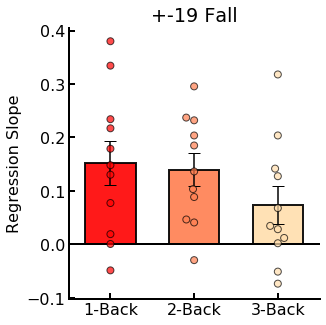

In [9]:
filter_plusminus = 19
fitting_all_data_19 = pd.DataFrame()
fitting_ntype_data_19 = pd.DataFrame()
row_subject = 0
row_all = 0
for ntype in nTypes: 
    row_type = 0
    fitting_tmp = pd.DataFrame()
    for subject in Fall:

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
        subjectdata = pd.read_csv(filename)
        

        # select the columns we care about
        subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
        # drop the NaNs, see above the explanation why
        subjectdata_nonan = subjectdata_selcols.dropna()
        
        # restrict to +- 19
        subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
        # fit regression line
        slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
#         plt.figure(figsize=(5, 4))
#         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
#         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
#         plt.xlabel('Stimulus Difference')
#         plt.ylabel('Response Error')
#         plt.xlim(-20, 20)
#         plt.ylim(-60, 60)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.eps', bbox_inches='tight', dpi=1200)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures_naive.jpg', bbox_inches='tight', dpi=1200)
        
        fitting_all_data_19.loc[row_subject, 'SUBJECT'] = subject
        fitting_all_data_19.loc[row_subject, 'TYPE'] = ntype        
        fitting_all_data_19.loc[row_subject, 'SLOPE'] = slope
        fitting_all_data_19.loc[row_subject, 'INTERCEPT'] =intercept
        
        fitting_tmp.loc[row_type, 'SUBJECT'] = subject
        fitting_tmp.loc[row_type, 'TYPE'] = ntype        
        fitting_tmp.loc[row_type, 'SLOPE'] = slope
        fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
        row_type += 1
        row_subject += 1
        
    mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_sem(fitting_tmp['SLOPE'])

    fitting_ntype_data_19.loc[row_all, 'TYPE'] = ntype
    fitting_ntype_data_19.loc[row_all, 'SLOPE_MEAN'] = mean_slope
    fitting_ntype_data_19.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
    fitting_ntype_data_19.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
    row_all += 1
    
    
fitting_ci_19 = pd.DataFrame(columns= nTypes)
for i in range(len(fitting_ntype_data_19)):
    
    print(i)
    ntype = fitting_ntype_data_19.loc[i, 'TYPE']
    low = fitting_ntype_data_19.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data_19.loc[i, 'SLOPE_CI_LOW']
    up = fitting_ntype_data_19.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data_19.loc[i, 'SLOPE_MEAN'] 
    
    fitting_ci_19.loc[0, ntype] = low
    fitting_ci_19.loc[1, ntype] = up
    
    
plt.figure(figsize=(4.5, 5))

plt.bar(fitting_ntype_data_19['TYPE'], fitting_ntype_data_19['SLOPE_MEAN'], yerr=fitting_ci_19.to_numpy(), ecolor='black',
       capsize=6, color = ['red', 'coral', 'navajowhite'], edgecolor='k', alpha=0.9, width=0.6, linewidth=2)
ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data_19, dodge=True, size=7, alpha=0.7, edgecolor='k', linewidth=1, palette=['red', 'coral', 'navajowhite'])
plt.title('+-' +  str(filter_plusminus) + ' Fall')
plt.ylabel('Regression Slope')
plt.xlabel('')
ax.set_xticklabels(['1-Back', '2-Back', '3-Back'])
plt.axhline(0, linestyle='-', linewidth=2, c='k')
sns.despine()
plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives_fall.eps', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives_fall.svg', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_naives_fall.svg', bbox_inches='tight', dpi=1200)


# Bootstrapped regression

In [10]:
Fall = ['AR', 'CK', 'CT', 'EW', 'HL', 'IS', 'JP', 'MF', 'NC', 'SK', 'SS']
Spring = ['AS', 'CAN', 'CG', 'EK', 'ES', 'HE', 'HOL', 'HY', 'SA']

## Spring 

Spring is commented out because in analysis 5/22/2020 does not contain spring subjects data. uncomment if added.

In [36]:
# bootstrap_data = pd.DataFrame()
# row_subject = 0
# for ntype in nTypes:
#     for subject in Spring:
#         print(subject)
#         subjectdata_temp = pd.DataFrame()

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
#         subjectdata = pd.read_csv(filename)
#         subjectdata_temp.loc[row_subject, 'SUBJECT'] = subject
#         subjectdata_temp.loc[row_subject, 'TYPE'] = ntype
        
#         for iteration in range(len(subjectdata['slopes'])):
            
#             subjectdata_temp.loc[row_subject, str(iteration)] = subjectdata.loc[iteration, 'slopes']

    
#         if (ntype == '1') & (subject == 'S1'):
#             bootstrap_data = subjectdata_temp

#         else:
#             bootstrap_data = pd.concat([bootstrap_data, subjectdata_temp])
            
#         row_subject += 1



In [37]:
# bootstrap_trimed = pd.DataFrame()

# row = 0
# for ntype in nTypes:
    
#     print(ntype)
#     type_data = bootstrap_data[bootstrap_data['TYPE'] == ntype]
    
#     for iteration in range(5000):
        
#         column = str(iteration)
        
#         bootstrap_trimed.loc[row,'TYPE'] = ntype
#         bootstrap_trimed.loc[row, column] = np.mean(type_data[column])
        
    
#     row += 1

In [38]:
# type_boot = pd.DataFrame()
# row=0
# for ntype in nTypes:
    
#     type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)
#     mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(type_data.iloc[0, 1:])
    
#     type_boot.loc[row, 'TYPE'] = ntype
#     type_boot.loc[row, 'MEAN'] = mean
#     type_boot.loc[row, 'CI_LOW'] = ci_low
#     type_boot.loc[row, 'CI_UP'] = ci_up
    
#     row += 1
    

In [39]:
# alldata_ci_boot = pd.DataFrame(columns= nTypes)
# for i in range(len(type_boot)):
    
#     print(i)
#     ntype = type_boot.loc[i, 'TYPE']
#     low = type_boot.loc[i, 'MEAN'] - type_boot.loc[i, 'CI_LOW']
#     up = type_boot.loc[i, 'CI_UP'] - type_boot.loc[i, 'MEAN'] 
    
#     alldata_ci_boot.loc[0, ntype] = low
#     alldata_ci_boot.loc[1, ntype] = up

In [40]:

# alldata_boot = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_SLOPE'])
# ntype_data_trimed = pd.DataFrame()
# ntype_data = pd.DataFrame()

# row_type = 0
# for ntype in nTypes:
#     row = 0
#     alldata_trimed_boot = pd.DataFrame()
#     for subject in Spring:
#         subjectdata_temp = pd.DataFrame()

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
#         subjectdata = pd.read_csv(filename)
#         subjectdata_temp['BOOTSTRAP_SLOPE'] = subjectdata['slopes']
#         subjectdata_temp.loc[:, 'SUBJECT'] = subject
#         subjectdata_temp.loc[:, 'NTYPE'] = ntype

#         print(subject)
#         alldata_trimed_boot.loc[row,'SUBJECT'] = subject

#         mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(subjectdata['slopes'])
        
#         alldata_trimed_boot.loc[row, 'NTYPE'] = ntype
#         alldata_trimed_boot.loc[row, 'BOOTSTRAP_MEAN'] = mean
#         alldata_trimed_boot.loc[row, 'BOOTSTRAP_CI_LOW'] = ci_low
#         alldata_trimed_boot.loc[row, 'BOOTSTRAP_CI_UP'] = ci_up


#         row += 1
    
#     if ntype == '1':
#         ntype_data = alldata_trimed_boot
        
#     else:
#         ntype_data = pd.concat([ntype_data, alldata_trimed_boot])
        
#     print(len(alldata_trimed_boot))
#     mean_type, ci_low_type, ci_up_type = mean_confidence_interval.mean_confidence_interval(alldata_trimed_boot['BOOTSTRAP_MEAN'])
#     ntype_data_trimed.loc[row_type, 'NTYPE'] = alldata_trimed_boot.NTYPE.unique()
#     ntype_data_trimed.loc[row_type, 'NTYPE_MEAN'] = mean_type
#     ntype_data_trimed.loc[row_type, 'NTYPE_CI_LOW'] = ci_low_type
#     ntype_data_trimed.loc[row_type, 'NTYPE_CI_UP'] = ci_up_type
    
#     row_type += 1
    

    
    
        


### Plot 

In [41]:
# boostrap_trimed_reorganized = pd.DataFrame()
# row = 0
# for ntype in nTypes:
    
#     type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)

#     for iteration in range(5000):
        
        
#         boostrap_trimed_reorganized.loc[row, 'TYPE'] = ntype
#         boostrap_trimed_reorganized.loc[row, 'BOOSTRAP_MEAN'] = type_data.loc[0, str(iteration)]
        
        
#         row += 1
        
        

In [42]:
# plt.figure(figsize=(4.5, 5))

# plt.bar(type_boot['TYPE'], type_boot['MEAN'], yerr=alldata_ci_boot.to_numpy(), ecolor='black',
#        capsize=6,color = ['red', 'coral', 'navajowhite'], edgecolor='k', alpha=0.9, width=0.6, linewidth=2)
# ax = sns.swarmplot(x='NTYPE', y="BOOTSTRAP_MEAN", data=ntype_data, dodge=True, size=7, alpha=0.7,edgecolor='k', linewidth=1, palette=['red', 'coral', 'navajowhite'])
# sns.despine()
# plt.ylabel('Regression Slope')
# plt.xlabel('')
# ax.set_xticklabels(['1-Back', '2-Back', '3-Back'])
# plt.axhline(0, linestyle='-', linewidth=2, c='k')
# sns.despine()
# # plt.yticks(np.arange(-3, 7, 1.0))
# plt.savefig('RegressionSlope_boot_spring_naives.svg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_boot_spring_naives.jpg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_boot_spring_naives.eps', bbox_inches='tight', dpi=1200)

## Fall 

In [11]:
bootstrap_data = pd.DataFrame()
row_subject = 0
for ntype in nTypes:
    for subject in Fall:
        print(subject)
        subjectdata_temp = pd.DataFrame()

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        subjectdata = pd.read_csv(filename)
        subjectdata_temp.loc[row_subject, 'SUBJECT'] = subject
        subjectdata_temp.loc[row_subject, 'TYPE'] = ntype
        
        for iteration in range(len(subjectdata['slopes'])):
            
            subjectdata_temp.loc[row_subject, str(iteration)] = subjectdata.loc[iteration, 'slopes']

    
        if (ntype == '1') & (subject == 'S1'):
            bootstrap_data = subjectdata_temp

        else:
            bootstrap_data = pd.concat([bootstrap_data, subjectdata_temp])
            
        row_subject += 1



AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS


In [12]:
bootstrap_trimed = pd.DataFrame()

row = 0
for ntype in nTypes:
    
    print(ntype)
    type_data = bootstrap_data[bootstrap_data['TYPE'] == ntype]
    
    for iteration in range(5000):
        
        column = str(iteration)
        
        bootstrap_trimed.loc[row,'TYPE'] = ntype
        bootstrap_trimed.loc[row, column] = np.mean(type_data[column])
        
    
    row += 1

1
2
3


In [13]:
type_boot = pd.DataFrame()
row=0
for ntype in nTypes:
    
    type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)
    mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(type_data.iloc[0, 1:])
    
    type_boot.loc[row, 'TYPE'] = ntype
    type_boot.loc[row, 'MEAN'] = mean
    type_boot.loc[row, 'CI_LOW'] = ci_low
    type_boot.loc[row, 'CI_UP'] = ci_up
    
    row += 1
    

In [14]:
alldata_ci_boot = pd.DataFrame(columns= nTypes)
for i in range(len(type_boot)):
    
    print(i)
    ntype = type_boot.loc[i, 'TYPE']
    low = type_boot.loc[i, 'MEAN'] - type_boot.loc[i, 'CI_LOW']
    up = type_boot.loc[i, 'CI_UP'] - type_boot.loc[i, 'MEAN'] 
    
    alldata_ci_boot.loc[0, ntype] = low
    alldata_ci_boot.loc[1, ntype] = up

0
1
2


In [15]:

alldata_boot = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_SLOPE'])
ntype_data_trimed = pd.DataFrame()
ntype_data = pd.DataFrame()

row_type = 0
for ntype in nTypes:
    row = 0
    alldata_trimed_boot = pd.DataFrame()
    for subject in Fall:
        subjectdata_temp = pd.DataFrame()

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        subjectdata = pd.read_csv(filename)
        subjectdata_temp['BOOTSTRAP_SLOPE'] = subjectdata['slopes']
        subjectdata_temp.loc[:, 'SUBJECT'] = subject
        subjectdata_temp.loc[:, 'NTYPE'] = ntype

        print(subject)
        alldata_trimed_boot.loc[row,'SUBJECT'] = subject

        mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(subjectdata['slopes'])
        
        alldata_trimed_boot.loc[row, 'NTYPE'] = ntype
        alldata_trimed_boot.loc[row, 'BOOTSTRAP_MEAN'] = mean
        alldata_trimed_boot.loc[row, 'BOOTSTRAP_CI_LOW'] = ci_low
        alldata_trimed_boot.loc[row, 'BOOTSTRAP_CI_UP'] = ci_up


        row += 1
    
    if ntype == '1':
        ntype_data = alldata_trimed_boot
        
    else:
        ntype_data = pd.concat([ntype_data, alldata_trimed_boot])
        
    print(len(alldata_trimed_boot))
    mean_type, ci_low_type, ci_up_type = mean_confidence_interval.mean_confidence_interval(alldata_trimed_boot['BOOTSTRAP_MEAN'])
    ntype_data_trimed.loc[row_type, 'NTYPE'] = alldata_trimed_boot.NTYPE.unique()
    ntype_data_trimed.loc[row_type, 'NTYPE_MEAN'] = mean_type
    ntype_data_trimed.loc[row_type, 'NTYPE_CI_LOW'] = ci_low_type
    ntype_data_trimed.loc[row_type, 'NTYPE_CI_UP'] = ci_up_type
    
    row_type += 1
    

    
    
        


AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
11
AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
11
AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
11


### Plot

In [16]:
boostrap_trimed_reorganized = pd.DataFrame()
row = 0
for ntype in nTypes:
    
    type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)

    for iteration in range(5000):
        
        
        boostrap_trimed_reorganized.loc[row, 'TYPE'] = ntype
        boostrap_trimed_reorganized.loc[row, 'BOOSTRAP_MEAN'] = type_data.loc[0, str(iteration)]
        
        
        row += 1
        
        

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

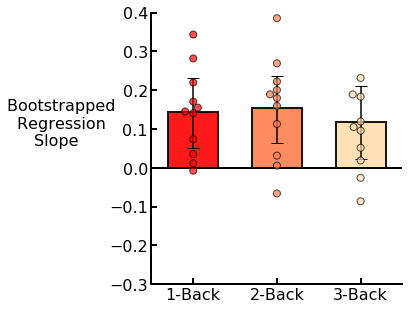

In [17]:
plt.figure(figsize=(4.5, 5))

plt.bar(type_boot['TYPE'], type_boot['MEAN'], yerr=alldata_ci_boot.to_numpy(), ecolor='black',
       capsize=6,color = ['red', 'coral', 'navajowhite'], edgecolor='k', alpha=0.9, width=0.6, linewidth=2)
ax = sns.swarmplot(x='NTYPE', y="BOOTSTRAP_MEAN", data=ntype_data, dodge=True, size=7, alpha=0.7,edgecolor='k', linewidth=1, palette=['red', 'coral', 'navajowhite'])
sns.despine()
plt.ylabel('Bootstrapped                 \nRegression                 \nSlope                   ', rotation=0)
plt.xlabel('')
ax.set_xticklabels(['1-Back', '2-Back', '3-Back'])
plt.axhline(0, linestyle='-', linewidth=2, c='k')
sns.despine()
plt.ylim([-0.3, 0.4])
plt.yticks(np.arange(-0.3, 0.5, 0.1))
# plt.yticks(np.arange(-3, 7, 1.0))
plt.savefig('RegressionSlope_boot_fall_naives.svg', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_boot_fall_naives.jpg', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_boot_fall_naives.eps', bbox_inches='tight', dpi=1200)

### Test significantce 

0.9984


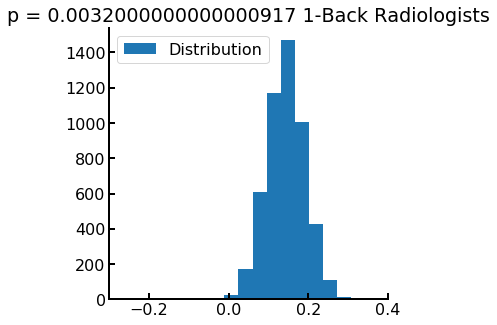

In [18]:
compDistributions.sigDistribution(bootstrap_trimed.iloc[0, 1:], extra_title=' 1-Back Radiologists', xlim=[-0.3, 0.4])

1.0


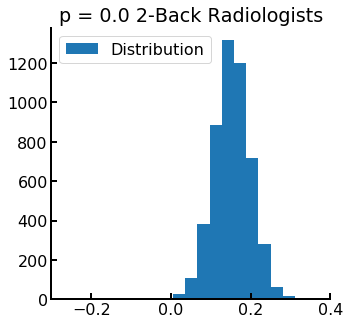

In [19]:
compDistributions.sigDistribution(bootstrap_trimed.iloc[1, 1:], extra_title=' 2-Back Radiologists', xlim=[-0.3, 0.4])

0.9938


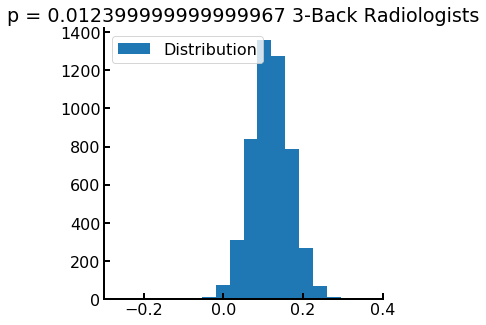

In [20]:
compDistributions.sigDistribution(bootstrap_trimed.iloc[2, 1:], extra_title=' 3-Back Radiologists', xlim=[-0.3, 0.4])

## All 

In [53]:
bootstrap_data = pd.DataFrame()
row_subject = 0
for ntype in nTypes:
    for subject in subject_names:
        print(subject)
        subjectdata_temp = pd.DataFrame()

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        subjectdata = pd.read_csv(filename)
        subjectdata_temp.loc[row_subject, 'SUBJECT'] = subject
        subjectdata_temp.loc[row_subject, 'TYPE'] = ntype
        
        for iteration in range(len(subjectdata['slopes'])):
            
            subjectdata_temp.loc[row_subject, str(iteration)] = subjectdata.loc[iteration, 'slopes']

    
        if (ntype == '1') & (subject == 'S1'):
            bootstrap_data = subjectdata_temp

        else:
            bootstrap_data = pd.concat([bootstrap_data, subjectdata_temp])
            
        row_subject += 1



AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS


In [54]:
bootstrap_trimed = pd.DataFrame()

row = 0
for ntype in nTypes:
    
    print(ntype)
    type_data = bootstrap_data[bootstrap_data['TYPE'] == ntype]
    
    for iteration in range(5000):
        
        column = str(iteration)
        
        bootstrap_trimed.loc[row,'TYPE'] = ntype
        bootstrap_trimed.loc[row, column] = np.mean(type_data[column])
        
    
    row += 1

1
2
3


In [55]:
type_boot = pd.DataFrame()
row=0
for ntype in nTypes:
    
    type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)
    mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(type_data.iloc[0, 1:])
    
    type_boot.loc[row, 'TYPE'] = ntype
    type_boot.loc[row, 'MEAN'] = mean
    type_boot.loc[row, 'CI_LOW'] = ci_low
    type_boot.loc[row, 'CI_UP'] = ci_up
    
    row += 1
    

In [56]:
alldata_ci_boot = pd.DataFrame(columns= nTypes)
for i in range(len(type_boot)):
    
    print(i)
    ntype = type_boot.loc[i, 'TYPE']
    low = type_boot.loc[i, 'MEAN'] - type_boot.loc[i, 'CI_LOW']
    up = type_boot.loc[i, 'CI_UP'] - type_boot.loc[i, 'MEAN'] 
    
    alldata_ci_boot.loc[0, ntype] = low
    alldata_ci_boot.loc[1, ntype] = up

0
1
2


In [57]:

alldata_boot = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_SLOPE'])
ntype_data_trimed = pd.DataFrame()
ntype_data = pd.DataFrame()

row_type = 0
for ntype in nTypes:
    row = 0
    alldata_trimed_boot = pd.DataFrame()
    for subject in subject_names:
        subjectdata_temp = pd.DataFrame()

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        subjectdata = pd.read_csv(filename)
        subjectdata_temp['BOOTSTRAP_SLOPE'] = subjectdata['slopes']
        subjectdata_temp.loc[:, 'SUBJECT'] = subject
        subjectdata_temp.loc[:, 'NTYPE'] = ntype

        print(subject)
        alldata_trimed_boot.loc[row,'SUBJECT'] = subject

        mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(subjectdata['slopes'])
        
        alldata_trimed_boot.loc[row, 'NTYPE'] = ntype
        alldata_trimed_boot.loc[row, 'BOOTSTRAP_MEAN'] = mean
        alldata_trimed_boot.loc[row, 'BOOTSTRAP_CI_LOW'] = ci_low
        alldata_trimed_boot.loc[row, 'BOOTSTRAP_CI_UP'] = ci_up


        row += 1
    
    if ntype == '1':
        ntype_data = alldata_trimed_boot
        
    else:
        ntype_data = pd.concat([ntype_data, alldata_trimed_boot])
        
    print(len(alldata_trimed_boot))
    mean_type, ci_low_type, ci_up_type = mean_confidence_interval.mean_confidence_interval(alldata_trimed_boot['BOOTSTRAP_MEAN'])
    ntype_data_trimed.loc[row_type, 'NTYPE'] = alldata_trimed_boot.NTYPE.unique()
    ntype_data_trimed.loc[row_type, 'NTYPE_MEAN'] = mean_type
    ntype_data_trimed.loc[row_type, 'NTYPE_CI_LOW'] = ci_low_type
    ntype_data_trimed.loc[row_type, 'NTYPE_CI_UP'] = ci_up_type
    
    row_type += 1
    

    
    
        


AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
11
AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
11
AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
11


### Plot 

In [58]:
boostrap_trimed_reorganized = pd.DataFrame()
row = 0
for ntype in nTypes:
    
    type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)

    for iteration in range(5000):
        
        
        boostrap_trimed_reorganized.loc[row, 'TYPE'] = ntype
        boostrap_trimed_reorganized.loc[row, 'BOOSTRAP_MEAN'] = type_data.loc[0, str(iteration)]
        
        
        row += 1
        
        

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

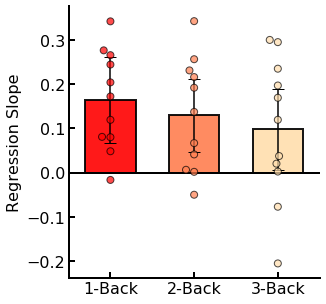

In [59]:
plt.figure(figsize=(4.5, 5))

plt.bar(type_boot['TYPE'], type_boot['MEAN'], yerr=alldata_ci_boot.to_numpy(), ecolor='black',
       capsize=6,color = ['red', 'coral', 'navajowhite'], edgecolor='k', alpha=0.9, width=0.6, linewidth=2)
ax = sns.swarmplot(x='NTYPE', y="BOOTSTRAP_MEAN", data=ntype_data, dodge=True, size=7, alpha=0.7,edgecolor='k', linewidth=1, palette=['red', 'coral', 'navajowhite'])
sns.despine()
plt.ylabel('Regression Slope')
plt.xlabel('')
ax.set_xticklabels(['1-Back', '2-Back', '3-Back'])
plt.axhline(0, linestyle='-', linewidth=2, c='k')
sns.despine()
# plt.yticks(np.arange(-3, 7, 1.0))
plt.savefig('RegressionSlope_boot_all_naives.svg', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_boot_all_naives.jpg', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_boot_all_naives.eps', bbox_inches='tight', dpi=1200)